In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def read_data(file: str, file_number: int) -> pd.DataFrame:
    """Read experiment csv dataset.

    Parameters
    ----------
    file : str
        filename
    file_number : int
        file number in order.

    Returns
    -------
    pd.DataFrame
        Dataframe column info:
        "volume": Metastatic tumor volume of A549 (10^5 um^3)
        "d0": Distance from A549 to alpha-SMA (10^2 um)
        "d1": Distance from A549 to VEGFR3 (10^2 um)
    """
    df = pd.read_csv(file)
    df.columns = ["file", "volume", "d0", "d1", "d2"]
    df["file"] = file_number
    return df

In [5]:
# Load data, use only D11 dataset.
files = [
    "190708_A549-mCh_Tb_D7_1D11iv_01x32_2_590_pCG_p50d2.csv",
    "190708_A549-mCh_Tb_D7_1D11iv_02x32_590_pCG_p50d2.csv",
    "190708_A549-mCh_Tb_D7_1D11iv_03x32_590_pCG_p50d2.csv",
    "190708_A549-mCh_Tb_D7_MsIgGiv_04x32_590_pCG_p50d2.csv",
    "190708_A549-mCh_Tb_D7_MsIgGiv_05x32_590_pCG_p50d2.csv",
    "190708_A549-mCh_Tb_D7_MsIgGiv_06x32_590_pCG_p50d2.csv",
]
df_list = [read_data(file, i + 1) for i, file in enumerate(files)]
df11 = pd.concat(df_list[0:3], axis=0, ignore_index=True)

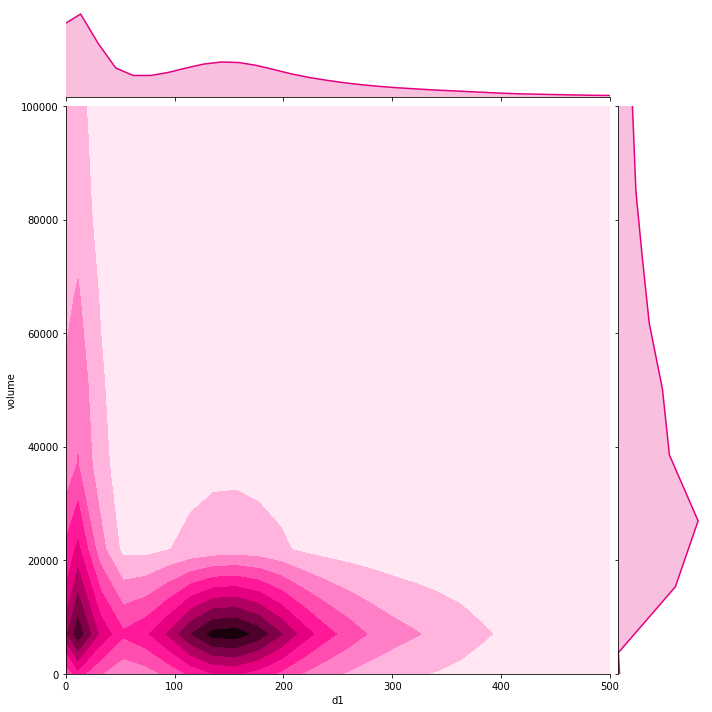

In [6]:
# D1 X Volume
fig = sns.jointplot(
    "d1",
    "volume",
    data=df11,
    kind="kde",
    color="#E4007E",
    stat_func=None,
    size=10,
    ratio=6,
    space=0.1,
    xlim=(0, 500),
    ylim=(0, 100000),
)
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot01_demo.png")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot01_demo.pdf")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot01_demo.eps")

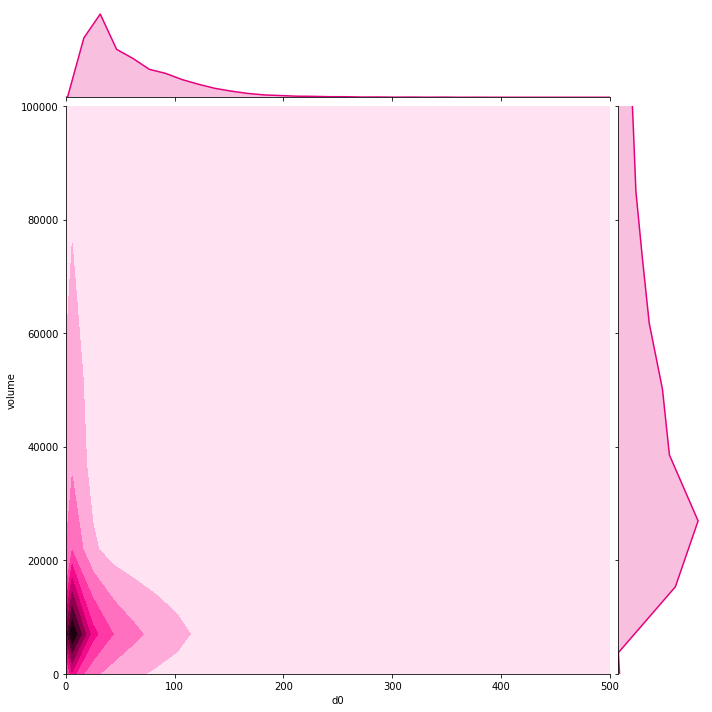

In [7]:
# D0 X Volume
fig = sns.jointplot(
    "d0",
    "volume",
    data=df11,
    kind="kde",
    color="#E4007E",
    stat_func=None,
    size=10,
    ratio=6,
    space=0.1,
    xlim=(0, 500),
    ylim=(0, 100000),
)
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot02_demo.png")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot02_demo.pdf")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot02_demo.eps")

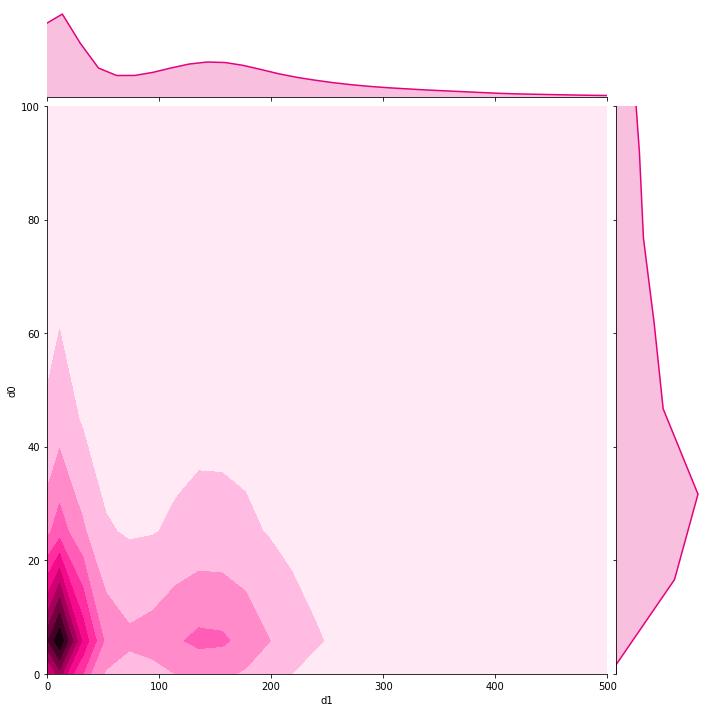

In [8]:
# D0 X D1
sns.jointplot(
    "d1",
    "d0",
    data=df11,
    kind="kde",
    color="#E4007E",
    stat_func=None,
    size=10,
    ratio=6,
    space=0.1,
    xlim=(0, 500),
    ylim=(0, 100),
)
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot03_demo.png")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot03_demo.pdf")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_jointplot03_demo.eps")

In [9]:
# Making an ECDF X (d0 & d1) plot
df3 = df_list[2]

# Create a figure of size 8x6 inches, 80 dots per inch
fig = plt.figure(figsize=(7, 7), dpi=300)
ax = fig.add_subplot(111)

# ECDF on d0
d0_sorted = np.sort(df3["d0"])
ecdf_d0 = np.arange(1, len(d0_sorted) + 1) / len(d0_sorted)
ax.plot(d0_sorted, ecdf_d0, color="#21AB38", marker=".", linestyle="none", label="Distance from SMA")

# ECDF on d1
d1_sorted = np.sort(df3["d1"])
ecdf_d1 = np.arange(1, len(d1_sorted) + 1) / len(d1_sorted)
ax.plot(d1_sorted, ecdf_d1, color="#E4007E", marker=".", linestyle="none", label="Distance from VR3")

plt.margins(0.02)  # Keeps data off plot edges
plt.axis([0, 500, 0, 1])
plt.xlabel("Distance from A549 cells")
plt.ylabel("ECDF")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_ECDF01_demo.pdf")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_ECDF01_demo.eps")
plt.savefig("191210_A549-mCh_Tb_D7_1D11_ECDF01_demo.png")

In [30]:
# Define root diretory
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190800_labnote/190708_1D11/190809_1D11dist/"

df_sum1 = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

# make csv file
filename = '191210_A549-mCh_Tb_D7_1D11_sum1.csv'

#save csv file
df_sum1.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum1)

df11 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df12 = pd.concat([df4, df5, df6], axis=0, ignore_index=True)

#df_sum2 = pd.concat([df41, df42, df43, df44, df45, df46, df47, df48, df49, df50], axis=1)
df_sum3 = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df_sum4 = pd.concat([df11, df12], axis=1)

#print(df_sumCon)

# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum2.csv"

#save csv file
#df_sum2.to_csv( filename, index=False, float_format='%.2f' )
#print (df_sum2)


# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum3.csv"

#save csv file
df_sum3.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum3)

# make csv file
filename = "191210_A549-mCh_Tb_D7_1D11_sum4.csv"

#save csv file
df_sum4.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum4)

         0          1       2       3       4
0      1.0    1555.26  164.18  454.55  400.90
1      1.0   98396.12   46.66   20.54   19.98
2      1.0   19388.91   24.84   32.96   31.40
3      1.0  120895.54   17.33   12.56   57.78
4      1.0   12338.40    4.33  126.21   37.60
...    ...        ...     ...     ...     ...
15140  6.0     518.42   27.81  112.08  115.75
15141  6.0     311.05   78.92  114.62  123.86
15142  6.0    4147.36   27.05  315.24  462.12
15143  6.0     414.74    2.35  536.71  258.17
15144  6.0     518.42   70.34  519.09  913.43

[93079 rows x 5 columns]
         0          1       2       3       4    0          1      2       3  \
0      1.0    1555.26  164.18  454.55  400.90  2.0  145987.07  10.56    5.17   
1      1.0   98396.12   46.66   20.54   19.98  2.0    3939.99  27.85    3.69   
2      1.0   19388.91   24.84   32.96   31.40  2.0    3836.31  83.75  106.00   
3      1.0  120895.54   17.33   12.56   57.78  2.0   21358.90  43.06  152.50   
4      1.0   12338.40 

In [27]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

#おまじない
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [34]:
#making an ECDF
import matplotlib.pyplot as plt
import numpy as np

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(10, 10), dpi=300)

x2 = np.sort(df3["2"])
y2 = np.arange(1, len(x2)+1)/len(x2)
_ = plt.plot(x2, y2, color="#21AB38", marker='.', linestyle='none')
_ = plt.xlabel('Distance from SMA')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.axis([0, 500, 0, 1])

x3 = np.sort(df3["3"])
y3 = np.arange(1, len(x3)+1)/len(x3)
_ = plt.plot(x3, y3, color="#E4007E", marker='.', linestyle='none')
_ = plt.xlabel('Distance from VR3')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.axis([0, 500, 0, 1])


plt.show

plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.pdf')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.eps')
plt.savefig('191210_A549-mCh_Tb_D7_1D11_ECDF01.png')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
